In [13]:
%reset -f

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns
pd.set_option("display.max_rows",None) #show all columns

In [14]:
df1=pd.read_csv('dataset/silage-corn-farm.csv')


In [15]:

df2=df1.copy()
#display(df2)
df2=df1[['Province','Province_number','Ecwat','soil_texture_heavy0normallight1','ETo_mm'
         ,'irrig_water_m3ha','growth_days_GI','irrigation_count','yield_tonha']].copy()
display(df2)


,Province,Province_number,Ecwat,soil_texture_heavy0normallight1,ETo_mm,irrig_water_m3ha,growth_days_GI,irrigation_count,yield_tonha
0,Alborz,1,0.4,1,594,6300,97,7,33.4
1,Alborz,1,0.4,1,594,10670,97,10,45.0
2,Alborz,1,0.4,0,537,8978,98,10,59.4
3,Alborz,1,0.4,1,594,9070,97,8,60.0
4,Alborz,1,0.4,1,548,9257,96,8,50.0
5,Alborz,1,0.3,1,561,4478,98,21,60.0
6,Tehran,2,0.6,1,700,6800,102,8,33.5
7,Tehran,2,0.6,1,650,6920,96,10,41.0
8,Tehran,2,0.9,0,732,6430,92,8,45.0
9,Tehran,2,0.9,0,597,6930,91,9,48.0


In [16]:

x_province=df2['Province_number'].to_numpy()
x_ecwat = df2['Ecwat'].to_numpy()
x_soil = df2['soil_texture_heavy0normallight1'].to_numpy()
x_eto = df2['ETo_mm'].to_numpy()
x_wat = df2['irrig_water_m3ha'].to_numpy()
x_gd = df2['growth_days_GI'].to_numpy()
x_ie = df2['irrigation_count'].to_numpy()
y = df2['yield_tonha'].to_numpy()



#N=len(y)
x=np.c_[x_province,x_ecwat,x_soil,x_eto,x_wat,x_gd,x_ie]
province=df2['Province'].astype(str).values.tolist()

In [17]:
#province_unique= list(set(province))
#for i in range(8):
    #print(province_unique[i],province.count(province_unique[i]))

In [18]:
NProv=8
province_unique= [None] *NProv

for i in range(1,NProv+1):
    province_unique[i-1]=province[np.where(x_province==i)[0][0]]

In [19]:
for i in range(NProv):
    print(i+1,province_unique[i],np.count_nonzero(x_province==i+1))

1 Alborz 6
2 Tehran 19
3 Gazvin 10
4 Ardabil 6
5 Esfahan 9
6 Fars 12
7 KhorasanR 18
8 Khozestan 24


y1=60*(a[20]+a[21]*x_wat/x_eto/10+a[22]*x_ie/10+a[23]*x_ecwat/1.5+a[24]*x_gd/100)
alborz tehran, y1 [0.449 0.108 0.234 0.272]
qazvin tehran, y2 [-0.265  0.075  0.019  0.015]
esfahan fars,  y3 [ 2.259 -0.267  0.049 -0.304]
khorasan raz,  y4 [-0.132  0.453  0.323  0.203]
khozestan,     y5 [ 0.76  -0.237  0.14  -0.053]


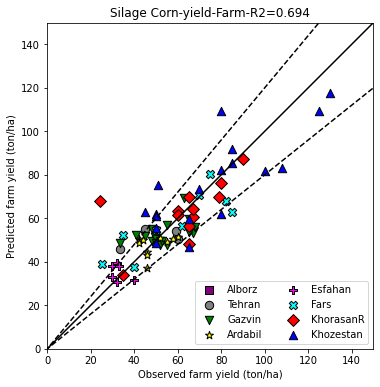

In [20]:



a = [1.358, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

def func1(a,x):
    
    x_province=x[:,0]
    x_ecwat=x[:,1]
    x_soil=x[:,2]
    x_eto=x[:,3]
    x_wat=x[:,4]
    x_gd=x[:,5]
    x_ie=x[:,6]
    
    y1=60*(a[0]+a[1]*x_wat/x_eto/10+a[2]*x_ie/10+a[3]*x_ecwat/1.5+a[4]*x_gd/100)
    y2=60*(a[5]+a[6]*x_wat/x_eto/10+a[7]*x_ie/10+a[8]*x_ecwat/1.5+a[9]*x_gd/100)
    y3=60*(a[10]+a[11]*x_wat/x_eto/10+a[12]*x_ie/10+a[13]*x_ecwat/1.5+a[14]*x_gd/100)
    y4=60*(a[15]+a[16]*x_wat/x_eto/10+a[17]*x_ie/10+a[18]*x_ecwat/1.5+a[19]*x_gd/100)
    y5=60*(a[20]+a[21]*x_wat/x_eto/10+a[22]*x_ie/10+a[23]*x_ecwat/1.5+a[24]*x_gd/100)
    
    c1=np.logical_or(x_province==1,x_province==2) #alborz tehran
    c2=np.logical_or(x_province==3,x_province==4) #gazvin ardabil
    c3=np.logical_or(x_province==5,x_province==6) #esfahan fars
    c4=x_province==7  #KhorasanR 
    c5=x_province==8 #Khozestan 
    
    y=y1
    y[c1]=y1[c1]
    y[c2]=y2[c2]
    y[c3]=y3[c3]
    y[c4]=y4[c4]
    y[c5]=y5[c5]


    return y




func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/50**2


res = minimize(func2,a)
a=np.round(res.x,3)

print("y1=60*(a[20]+a[21]*x_wat/x_eto/10+a[22]*x_ie/10+a[23]*x_ecwat/1.5+a[24]*x_gd/100)")
print("alborz tehran, y1",a[0:4])
print("qazvin tehran, y2",a[5:9])
print("esfahan fars,  y3",a[10:14])
print("khorasan raz,  y4",a[15:19])
print("khozestan,     y5",a[20:24])

#y1=32000*(-0.067+0.213*x_wat/11000+0.796*x_y1/20000)

yhat=func1(a,x)


fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)

markers_=['s','o','v','*','P','X','D','^','<','H','d','P','X','D']
colors_=['purple','gray','green','yellow','magenta','cyan','red','blue']

for i in range(NProv):
    cond=x_province==i
    m=ax.scatter(y[cond], yhat[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])

#ax.scatter(y,y_hat_lin1)
ax.legend(loc='lower right',ncol=2)

ax.plot(np.array([0,100000]),np.array([0,100000]), 'k-')
ax.plot(np.array([100000,0,100000]),np.array([120000,0,80000]), 'k--')
ax.set_xlabel('Observed farm yield (ton/ha)')
ax.set_ylabel('Predicted farm yield (ton/ha)')
ax.set_xlim(left=0,right=150)
ax.set_ylim(bottom=0,top=150)
ax.set_aspect('equal')
R2=np.round(r2_score(y,yhat),3)

ax.set_title("Silage Corn-yield-Farm-R2="+str(R2))
fig.savefig('fig/silage_corn_farm_yield.png', dpi=300)




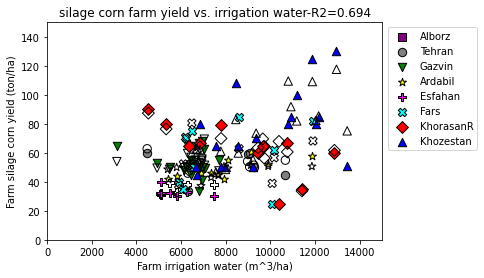

In [21]:
for i in range(NProv):
    cond=x_province==i
    plt.scatter(x_wat[cond], y[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])
    plt.scatter(x_wat[cond], yhat[cond],marker=markers_[i],s=70,facecolor='none',edgecolor='k')
    
    
plt.xlabel('Farm irrigation water (m^3/ha)')
plt.ylabel('Farm silage corn yield (ton/ha)')
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1)
plt.xlim(left=0,right=15000)
plt.ylim(bottom=0,top=150)

plt.title("silage corn farm yield vs. irrigation water-R2="+str(R2))
fig.savefig('fig/silage_corn_farm_yield_vs_irrigwat.png', dpi=300)